<a href="https://colab.research.google.com/github/bay195/Waste-Classification/blob/main/Waste-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UAS Machine Learning
# **Kelompok 6**
1. Bayu Unggul Sejati
2. Hengky Triyo
3. Salwa Salsabila
4. Rafi Albar Kurniawan

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications.efficientnet import EfficientNetB1, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import zipfile
import os
import flask

In [ ]:
data_url = 'https://github.com/bay195/Waste-Classification/raw/main/Anorganik.zip'
urllib.request.urlretrieve(data_url, 'Anorganik.zip')
local_file = 'Anorganik.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [ ]:
BASE_DIR = 'data/Anorganik'
train_dir = os.path.join(BASE_DIR, 'Train')
validation_dir = os.path.join(BASE_DIR, 'Validation')

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
target_size = (224, 224)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=target_size
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=target_size
)

Found 2226 images belonging to 6 classes.
Found 955 images belonging to 6 classes.


In [ ]:
base_model = EfficientNetB1(include_top=False, input_shape=(224, 224, 3))

27018416/27018416 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(6, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
69/69 [==============================] - ETA: 0s - loss: 0.7579 - accuracy: 0.7830

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 387s 5s/step - loss: 0.7579 - accuracy: 0.7830 - val_loss: 0.3073 - val_accuracy: 0.9364
Epoch 2/10
69/69 [==============================] - 411s 6s/step - loss: 0.2992 - accuracy: 0.9280 - val_loss: 0.2024 - val_accuracy: 0.9494
Epoch 3/10
69/69 [==============================] - 357s 5s/step - loss: 0.2509 - accuracy: 0.9262 - val_loss: 0.1730 - val_accuracy: 0.9494
Epoch 4/10
69/69 [==============================] - 406s 6s/step - loss: 0.2023 - accuracy: 0.9412 - val_loss: 0.1532 - val_accuracy: 0.9591
Epoch 5/10
69/69 [==============================] - 400s 6s/step - loss: 0.1884 - accuracy: 0.9467 - val_loss: 0.1448 - val_accuracy: 0.9634
Epoch 6/10
69/69 [==============================] - 354s 5s/step - loss: 0.1563 - accuracy: 0.9581 - val_loss: 0.1386 - val_accuracy: 0.9569
Epoch 7/10
69/69 [==============================] - 360s 5s/step - loss: 0.1385 - accuracy: 0.9640 - val_loss: 0.1345 - val_accuracy: 0.9612
Epoch 8/10
69/69 [======

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

30/30 [==============================] - 104s 3s/step - loss: 0.1245 - accuracy: 0.9623
Validation Loss: 0.12454579025506973
Validation Accuracy: 0.962303638458252


In [ ]:
model.save("efficiennetB1.h5")

In [ ]:
model = load_model("efficiennetB1.h5")

In [ ]:
# Load and preprocess uploaded image
img_path = 'test.jpg'  # Ganti dengan path gambar yang diunggah
img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan dengan ukuran input model Anda
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Use preprocess_input function for EfficientNet
img_array = preprocess_input(img_array)

# Predict class
prediction = model.predict(img_array)

# Display result
print(prediction)

1/1 [==============================] - 3s 3s/step
[[9.9741697e-01 1.7583800e-03 9.6238036e-05 4.1899292e-04 2.8899647e-05
  2.8047187e-04]]


In [ ]:
# Memperoleh nama folder (kelas) dari generator pelatihan
class_names_train = train_generator.class_indices
print("Nama folder (kelas) dari generator pelatihan:", class_names_train)

# Memperoleh nama folder (kelas) dari generator validasi
class_names_validation = validation_generator.class_indices
print("Nama folder (kelas) dari generator validasi:", class_names_validation)

In [ ]:
# Kamus yang memetakan indeks ke nama folder kategori
class_names = {'BotolKaca': 0, 'BotolPlastik': 1, 'GelasDisposable': 2, 'Kaleng': 3, 'Kardus': 4, 'WadahKaca': 5}

# Output probabilitas dari model
output_probabilities = prediction

# Konversi output probabilitas ke dalam array NumPy
output_probabilities_array = np.array(output_probabilities)

# Mendapatkan indeks dari kelas dengan probabilitas tertinggi
predicted_class_index = np.argmax(output_probabilities_array)

# Mendapatkan nama folder kategori berdasarkan indeks
predicted_class_name = [name for name, index in class_names.items() if index == predicted_class_index][0]

# Tampilkan nama folder kategori yang diprediksi
print("Folder kategori yang diprediksi:", predicted_class_name)


Folder kategori yang diprediksi: BotolKaca


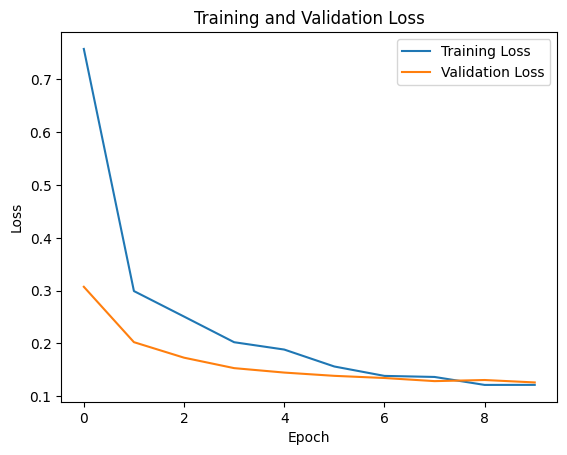

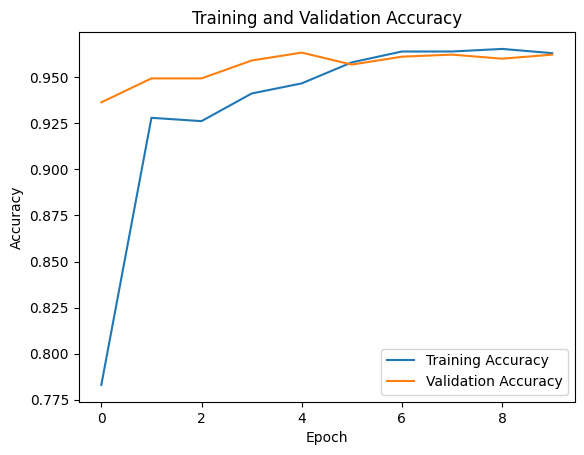

In [ ]:
import matplotlib.pyplot as plt

# Data riwayat pelatihan
history = {
    'loss': [0.7579, 0.2992, 0.2509, 0.2023, 0.1884, 0.1563, 0.1385, 0.1365, 0.1214, 0.1215],
    'accuracy': [0.7830, 0.9280, 0.9262, 0.9412, 0.9467, 0.9581, 0.9640, 0.9640, 0.9654, 0.9631],
    'val_loss': [0.3073, 0.2024, 0.1730, 0.1532, 0.1448, 0.1386, 0.1345, 0.1286, 0.1307, 0.1261],
    'val_accuracy': [0.9364, 0.9494, 0.9494, 0.9591, 0.9634, 0.9569, 0.9612, 0.9623, 0.9601, 0.9623]
}

# Plot loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Download and extract dataset
data_url = 'https://github.com/bay195/Waste-Classification/raw/main/Test.zip'
urllib.request.urlretrieve(data_url, 'Test.zip')
local_file = 'Test.zip'
with zipfile.ZipFile(local_file, 'r') as zip_ref:
    zip_ref.extractall('data/')


In [ ]:
# Define base directory
BASE_DIR_DATA = 'data/'
test_dir = os.path.join(BASE_DIR_DATA, 'Test')

In [ ]:
# Define image generator for test data
def validate_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                with Image.open(img_path) as img:
                    img.verify()  # Verify that it is, in fact, an image
                # Open and load again to ensure it can be processed
                with Image.open(img_path) as img:
                    img.load()
            except (IOError, SyntaxError, OSError) as e:
                print(f"Removing corrupted image: {img_path}")
                os.remove(img_path)

# Validate images in test directory
validate_images(test_dir)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Use the correct target size for EfficientNet (e.g., 224x224 for EfficientNetB0)
target_size = (224, 224)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=target_size,
    shuffle=False  # Important: Do not shuffle test data
)


Removing corrupted image: data/Test/GelasDisposable/GelasDisposableTest18.jpg
Removing corrupted image: data/Test/GelasDisposable/GelasDisposableTest37.jpg
Removing corrupted image: data/Test/GelasDisposable/GelasDisposableTest36.jpg
Removing corrupted image: data/Test/GelasDisposable/GelasDisposableTest43.jpg
Removing corrupted image: data/Test/GelasDisposable/GelasDisposableTest35.jpg
Found 295 images belonging to 6 classes.


In [ ]:
model = load_model("efficiennetB1.h5")

In [ ]:
# Function to get valid images and predictions
def get_valid_predictions(generator, model):
    valid_predictions = []
    valid_labels = []
    for i in range(len(generator)):
        try:
            data, labels = generator[i]
            preds = model.predict(data)
            valid_predictions.extend(np.argmax(preds, axis=1))
            valid_labels.extend(np.argmax(labels, axis=1))
        except (OSError, IOError) as e:
            print(f"Skipping corrupted batch {i}")
    return np.array(valid_predictions), np.array(valid_labels)

# Make predictions using the model
predicted_labels, true_labels = get_valid_predictions(test_generator, model)
# Get the class indices
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Print classification report which includes F1-score, recall, precision, etc.
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

# Calculate and print individual metrics
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

1/1 [==============================] - 3s 3s/step
Classification Report:
                 precision    recall  f1-score   support

      BotolKaca       1.00      0.80      0.89        50
   BotolPlastik       0.75      0.96      0.84        50
GelasDisposable       1.00      0.87      0.93        45
         Kaleng       0.74      0.86      0.80        50
         Kardus       0.96      1.00      0.98        50
      WadahKaca       0.93      0.78      0.85        50

       accuracy                           0.88       295
      macro avg       0.90      0.88      0.88       295
   weighted avg       0.90      0.88      0.88       295

Accuracy: 0.8779661016949153
F1 Score: 0.8798683013350225
Precision: 0.8951676610940201
Recall: 0.8779661016949153
